In [1]:
#set parent directory as package
import sys
sys.path.append("..")

In [2]:
#set parent directory as package
import sys
from data_tools.tools import read_experiment_dic_results, merge_temporary_files, load_feather_folder_as_pd, write_dic_results, rename_kernel
import matplotlib
import h5py
import os
from models.concentration_bounds import A_expressibility, haar_frame_potential, subspace_dimension

from plotting.quantities_vs_num_dimensions_vs_bandwidth import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import roc_auc_score

from matplotlib import rc
rc('text', usetex=True)


sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":22, 
                             "legend.fontsize":16, "xtick.labelsize":20, 
                             "ytick.labelsize":20, "legend.title_fontsize":14,  'lines.linewidth': 3, 'lines.markersize': 6})

#import mpatches


In [3]:
names_of_metrics_short =  [kernel_type_str, num_qubit_str, performance_str, top_eigenvalue_str, frobenius_str, g_str, bandwidth_str, varK_str]
names_of_metrics_long =  [kernel_type_str, num_qubit_str, performance_str, top_eigenvalue_str, frobenius_str, g_str, bandwidth_str, varK_str, expressibity_str]

In [4]:
#0 4 rbf, 0 12 rbf_poly_2 plasticc
##0 8 rbf, 0 16 rbf_poly_2 kMNIST28
##0 57 rbf, 0 62 rbf_poly_2 hidden-manifold

simulation_set_index, dataset_set_index = 0, 4   #4 
classical_name = 'plasticc'
kernel_to_compare = 'rbf'

pd_geo_gramm_performance_both_ds1, pd_geo_top_results_enc_ds1, values_of_best_quantum_ds1, values_of_best_poly_ds1, N_train_ds1, dataset_name_str_ds1, encoding_circuit_name_str_ds1, kernel_type_to_keep_ds1, path_to_save_ds1 = load_and_return_preprocessed(simulation_set_index, dataset_set_index, classical_name, kernel_to_compare, add_extra_path=True)

melted_ds1, kernel_type_to_keep_du, num_qubit_order = top_enc_melting_preprocess(pd_geo_top_results_enc_ds1, kernel_type_to_keep_ds1, encoding_circuit_name_str_ds1, kernel_to_compare, [kernel_type_str, num_qubit_str, performance_str, top_eigenvalue_str, frobenius_str, g_str, bandwidth_str, varK_str])


melted_only_comparedkernel_dummy, metric_categories, num_qubit_order, kernel_types, color_palette = melted_preprocess_as_of_bandwidth(pd_geo_gramm_performance_both_ds1, kernel_to_compare, num_qubit_order, encoding_circuit_name_str_ds1, names_of_metrics_long)


Simulation set index: 0 and dataset set index: 4
144.58626246452332
6.454515218734741
Index(['dataset_name', 'num_qubits', 'C_poly', 'bandwidth',
       'roc_auc_score_poly', 'y_pred_poly', 'y_pred_train_poly',
       'varK_train_poly', 'd_poly', 'K_max_eig_poly', 'd_poly',
       'roc_auc_score_train_poly', 'eigenvalues_poly', 'kernel', 'seed',
       'ck_poly', 'K_mean_train', 'num_datapoints', 'C_quantum',
       'roc_auc_score_quantum', 'y_pred_quantum', 'y_pred_train_quantum',
       'varK_train_quantum', 'd_quantum', 'K_max_eig_quantum', 'varK_test',
       'roc_auc_score_train_quantum', 'eigenvalues_quantum',
       'encoding_circuit_name', 'ck_quantum', 'method', 'classical_kernel',
       'quantum_kernel_name', 'degree', 'gamma', 'roc_auc_score_poly_extra',
       'K_max_eig_poly_extra', 'eigenvalues', 'ck', 'num_layers',
       'roc_auc_score_quantum_extra', 'K_max_eig_quantum_extra',
       'Frobenius Difference', '$d_G$', '$d_Gmod$', 'g_gen_train',
       'g_tra_train'],
  

c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\plotting\..\plotting\quantities_vs_num_dimensions_vs_bandwidth.py:885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_only_comparedkernel["num_qubits"] = pd.Categorical(melted_only_comparedkernel["num_qubits"], categories=num_qubit_order, ordered=True)
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\plotting\..\plotting\quantities_vs_num_dimensions_vs_bandwidth.py:886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

['rbf']
['Quantum' 'rbf']


c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\plotting\..\plotting\quantities_vs_num_dimensions_vs_bandwidth.py:885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_only_comparedkernel["num_qubits"] = pd.Categorical(melted_only_comparedkernel["num_qubits"], categories=num_qubit_order, ordered=True)
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\plotting\..\plotting\quantities_vs_num_dimensions_vs_bandwidth.py:886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

classification_problem True
960     $k^{(\mathrm{FQK})}$
964     $k^{(\mathrm{FQK})}$
967     $k^{(\mathrm{FQK})}$
969     $k^{(\mathrm{FQK})}$
971     $k^{(\mathrm{FQK})}$
                ...         
1407    $k^{(\mathrm{RBF})}$
1410    $k^{(\mathrm{RBF})}$
1424    $k^{(\mathrm{RBF})}$
1427    $k^{(\mathrm{RBF})}$
1432    $k^{(\mathrm{RBF})}$
Name: Kernel , Length: 96, dtype: object


c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2304: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2304: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


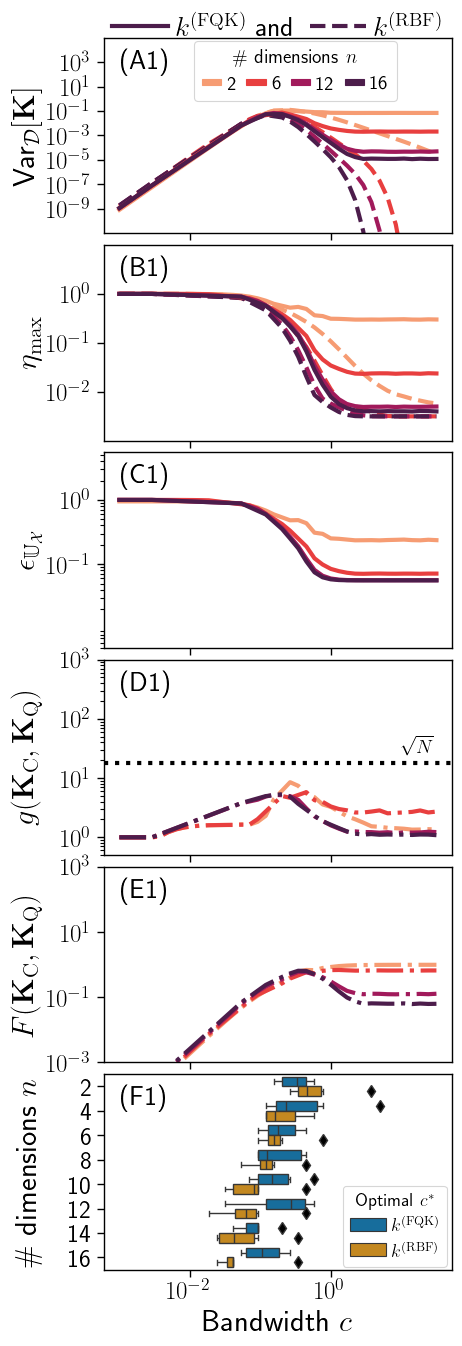

In [5]:
num_qubit_order = [2, 6, 12, 16]
plot_metric_bandwidth_different_plotting_styles(pd_geo_top_results_enc_ds1, pd_geo_gramm_performance_both_ds1, kernel_type_to_keep_ds1, encoding_circuit_name_str_ds1, dataset_name_str_ds1, "../data/plots/", N_train_ds1, kernel_to_compare, num_qubit_order, names_of_metrics_long, hide_ylabel=False, show_plt = False, single_param_style="full", extra_number=1, only_classical=False)